# A (quick and rough) reproduction of the radius gap using the Zeng+2019 model

The model assumes super Earth planets are rocky, and sub Neptune planets are made of 50% - 67% ice, with the rest being rock.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rc('font', family='sans serif', size=16)

# The details for their "Monte Carlo" simulation can be found in the Materials and Methods section at the end of the paper

Monte Carlo simply means "repeated random sampling." In this case, it is drawing random values for the ice-rock fraction for each observed planet and seeing what the corresponding distribution of radii is.

## Start with the distribution of observed planets

I was too lazy to download the dataset used in the paper (ExoplanetArchive planets with masses measured to better than 50% precision), so I eyeballed the mass distribution in Figure 2 (the blue and orange smoothed histograms) to create a synthetic planet population of 10,000 super Earths and 10,000 sub Neptunes.'

Try replacing the below with a real planet sample downloaded from the ExoplanetArchive!

- Another aspect of the simulation I didn't do was "blur" the distributions according to the typical measurement uncertainty ("$\pm 7%$ 1-$\sigma$ Gaussian errors in radius and $\pm 30%$ 1-$\sigma$ Gaussian errors in mass" are used in the paper). Try including that and see how it changes things!

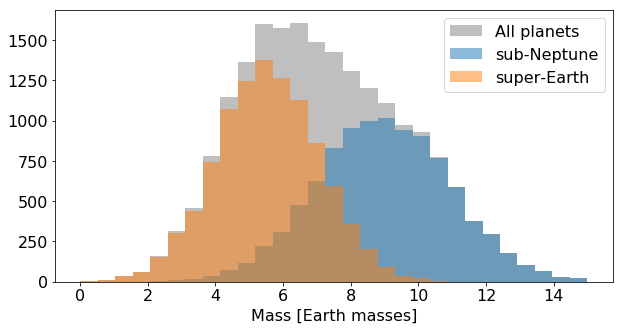

In [3]:
N = 10000

sE_mass = np.random.normal(5.5, 1.5, N)
sN_mass = np.random.normal(9, 2, N)

plt.figure(figsize=(10,5))
plt.hist(np.append(sN_mass, sE_mass), color='grey', alpha=0.5, zorder=0, bins=np.linspace(0, 15, 30), label='All planets')
plt.hist(sN_mass, color='C0', alpha=0.5, bins=np.linspace(0, 15, 30), label='sub-Neptune')
plt.hist(sE_mass, color='C1', alpha=0.5, bins=np.linspace(0, 15, 30), label='super-Earth');
plt.xlabel('Mass [Earth masses]')
plt.legend();

# Using icy+rock interpolation function to calculate sub-Neptune radii, and random guesses for how much ice a planet might have, creates the "Radius Gap"

/Users/ryanrubenzahl/miniconda3/envs/cps/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in power
  """Entry point for launching an IPython kernel.


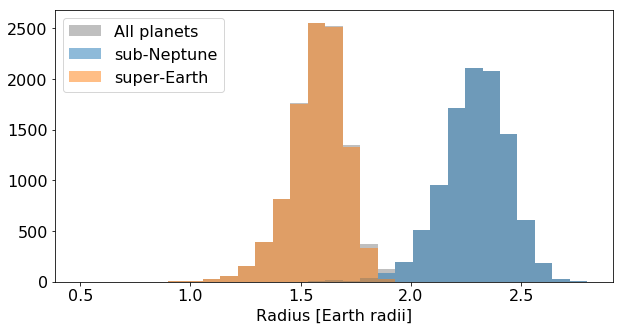

In [4]:
sE_rad = sE_mass**(1/3.7) # radius of a planet that is "Earth-like" rocky

x = np.random.uniform(1/2, 2/3, N) # Mass fraction of ice relative to rock
f = (1 + 0.55*x - 0.14*x**2) # interpolation function of planet structure model from previous paper by Zeng
sN_rad = f*sN_mass**(1/3.7)  # radius of a planet given its mass and ice/rock fraction

plt.figure(figsize=(10,5))
plt.hist(np.append(sE_rad, sN_rad), color='grey', alpha=0.5, zorder=0, bins=np.linspace(0.5, 2.8, 30), label='All planets')
plt.hist(sN_rad, color='C0', alpha=0.5, bins=np.linspace(0.5, 2.8, 30), label='sub-Neptune')
plt.hist(sE_rad, color='C1', alpha=0.5, bins=np.linspace(0.5, 2.8, 30), label='super-Earth')
plt.xlabel('Radius [Earth radii]')
plt.legend();

Note! The value $x$ being drawn from a uniform distribution between 1/2 and 2/3 is an example of a **prior**. These values are set by Zeng using the following "prior" information

> Then, “x” is assumed to follow a uniform distribution in-between 1/2 (solar rock/ H2O-ice ratio) and 2/3 (solar rock/total-ices ratio) for icy cores.

However, why should we assume the Solar system ratios accurately bound the possible ice/rock fractions in Exoplanetary systems? Shouldn't this also depend on where a planet forms in the disk? Try playing around with the range allowed by the prior and see how the predicted radius distribution changes...

Also, in the paper there was no model fit or model comparison! They didn't do a maximum likelihood fit or MCMC to find the best-fit range of ice/rock fractions that are consistent with the data. They only showed that, visually, ice/rock fractions between 1/2 and 2/3rds, when assumed for *only* the sub-Neptune population (super-Earths were assumed as 100% rocky) produce a bimodal radius distribution. Which is to be expected for **any hypothesis which leads to a lower bulk density for the planet!** The radii of all the sub-Neptunes will become larger *faster* than the radii of the super-Earths, as mass is increased. Thus the sub-Neptune population, which is intrinsically slightly more massive, will lead to a radius distribution that becomes separated more and more from the super-Earth radius distribution. There is no comparison to the actual, observed, radius distribution to show that the same relative occurance rate is predicted by the ice/rock model!

### A few questions/thoughts that I had after reading this paper about the ice/rock model:

1. Why shouldn't ice be a part of the 1.5 - 2 $R_\oplus$ planets? Some of these planets are less dense than if they were 100% rock, which would indicate some amount of lower-density material like ice or H/He gas. But the model above assumes that all the super-Earths are 100% Earth-like rocky (2/3rd rock, 1/3rd iron).

2. The 2 - 4 $R_\oplus$ planets are very well explained by a super-Earth-like planet (a rocky core of ~1.6 $R_\oplus$) surrounded by a H/He gas envelope of $\sim 1 - 3$% in mass. There is no model-comparison presented that shows how much better the ice/rock model is at explaining these planets than a rocky core + H/He envelope model.
    - Here's the original explanation for photoevaporation by Owen & Wu: https://arxiv.org/abs/1705.10810
    - Here's the discovery paper of the "Fulton Gap" made by the California Planet Search team, led by BJ Fulton: https://arxiv.org/abs/1703.10375
    - The technique for distinguishing between two models (given some data), which we didn't get to cover in the fitting methods lesson, is called Hypothesis Testing: https://en.wikipedia.org/wiki/Statistical_hypothesis_testing. 
        - One way to do this in a "Bayesian" sense is to see which model has the highest posterior probability by calculating how many times more likely model 1 is vs model 2: https://en.wikipedia.org/wiki/Bayes_factor
        
        
3. If ice is more prevelant further out in the disk (beyond the "ice line"), then we should expect to see a dependence on orbital period (equally orbital distance) on which planets have more ice in them vs others. For example, Pluto is 40% water-ice by mass and exists far out beyond the ice-line of the Solar System (I would hesitate to call Pluto a "water world" though, more like a "big comet"). The ice-line is pretty far out, so finding small planets Earth-Neptune sized that far distant is currently beyond our capabilities.

    - Or, is the orbital migration mechanisms the authors proposed to explain how these distant icy planets end up close to their stars sufficient to explain the number of icy planets we indeed see (e.g. predicted by their ice/rock model)? The authors didn't test this prediction.
    
    
4. Why is there a sudden transition from no ice below 2 $R_\oplus$ (the super-Earths are 100% rocky in their model), then for 2 - 4$R_\oplus$ planets they all have 50% - 67% ice by mass, the rest being rock. Is the physics of planet formation which might lead to such a specific and sudden transition in ice composition any more likely than the physics of photoevaporation, where small planets simply can't hold on to an gaseous envelope and intermediate-sized planets can?